# Homework 1:Regression (Resulting File)

In this homework, you will act as a data scientist for an e-commerce company, and use the skills you learned this week to analyze the company's transaction data to help them make predictions and business decisions. 



## Loading Data

The company in question is an e-commerce company, that sells various products to online customers. Customers must sign up as members to make purchases, and enter certain information about themselves in this process. The company is curious to see what factors influence customer purchasing behavior, and has compiled a data set giving you the following information for each customer: average monthly purchases in dollars, the amount of time they have been a member, and their age. How well can you predict purchasing behavior from these factors? 

We will build a linear regression model to examine this question. We'll begin by reading the file into a DataFrame, a spreadsheet-like object provided by the `Pandas` package, used for handling tabular data. **Run the code below to import the `Pandas` package, and then read the `.csv` file using the funtion `pd.read_csv` by passing that function the file name.** 



In [5]:
import pandas as pd
purchase_data = pd.read_csv("ecommerce_dataset.csv")


:Just as we did in lecture, **look first five rows of the Data Frame using the `.head()` method by running the cell below.**

In [6]:
purchase_data.head()

,Unnamed: 0,Average Monthly Purchases,Membership (Months),Age
0,0,650.32,15.0,40.0
1,1,616.29,39.2,63.0
2,2,813.15,34.1,82.0
3,3,1116.03,51.5,29.0
4,4,545.17,21.8,22.0


## Training Linear Regression Model in `scikit-learn`

As we noted in lecture, before training a linear regression model, we need to separate our training data into features - in this case, we have `Membership (Months)` and `Age` in years - and outcomes, which in this case are the `Average Monthy Purchases` in dollars. We will then use this data to train a model to predict these purchased amounts. First, let's see if we can predict purchases from only the length of membership. How do you expect purchase quanitities to change with increasing membership?

**Begin by running the cell below, taking the training features `X_train` to be `Membership (Months)` and the outcomes `y_train` to be `Average Monthy Purchases`.** 

In [7]:
# seperate data into features and outcomes
X_train = purchase_data[['Membership (Months)']]
y_train = purchase_data['Average Monthly Purchases']

Before doing any model fitting, it is always a good idea to visualize the data. **Run the code below, taken from the lecture, to plot membership versus purchases.** The `plt.scatter` function makes a plot of `x` against `y`, which we provide as columns from our DataFrame. Do you see any relationship? Do you expect the intercept and slope of a fitted linear regression model on this data to be positive or negative? 

Text(0, 0.5, 'Average Annual Purchases (Dollars)')

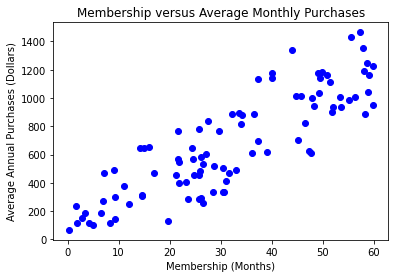

In [9]:
#load plotting library and numerical library
import matplotlib.pyplot as plt

#plot raw data
plt.scatter(x=purchase_data['Membership (Months)'], y=purchase_data['Average Monthly Purchases'],color="blue") #make scatterplot
plt.title('Membership versus Average Monthly Purchases') #plot title
plt.xlabel('Membership (Months)')
plt.ylabel('Average Annual Purchases (Dollars)')

Now, let's train our linear regression model on just the membership feature. We initialize a linear model by instantiating the `LinearRegression` class as in lecture, and we store this model in the variable `linear_reg_model_membership`. We then train this model on our data `X_train` and `y_train` by calling the method `.fit()`. This estimates linear model parameters $\theta_0$ (the model intercept) and $\theta_1$ (the slope). **Run the code below to train the model.**




In [10]:
#train create and train model
from sklearn.linear_model import LinearRegression

linear_reg_model_membership = LinearRegression()
linear_reg_model_membership.fit(X_train, y_train)

LinearRegression()

Now extract the estimates for these parameters from the trained model using `.intercept_` and `.coef_`, just as done in lecture, by **running the code in the cell below.** 

In [11]:
#examine coefficients 
theta0 = linear_reg_model_membership.intercept_ #extract intercept
theta1 = linear_reg_model_membership.coef_[0] # extract slope
print("fitted slope theta1=%s, fitted intercept theta0=%s" % (theta1, theta0))


fitted slope theta1=18.065958379496884, fitted intercept theta0=99.03495211667871


Do these slope and intercept values match the signs you predicted based on the plotted raw data?

Now, let's visually check the fit of our model by plotting it against the raw data using the `matplotlib` package. After importing the relevant packages, the first part of the code below plots the raw data as done above. The second part of the code generates distance values from the smallest to the largest `Membership (Months)` values, plugs these values into the linear regression formula $y = \theta_0 + \theta_1 x$ to get purchase predictions, and then plots the resulting values on the same plot. **Run this code to generate the plot**. How well does the fitted model match the raw data?  

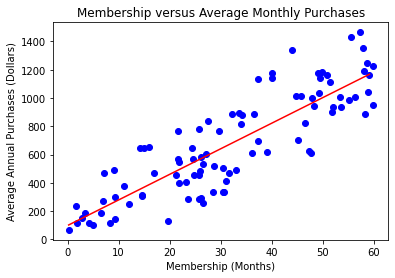

In [13]:
import numpy as np
#plot raw data
plt.scatter(x=purchase_data['Membership (Months)'], y=purchase_data['Average Monthly Purchases'],color="blue")
plt.title('Membership versus Average Monthly Purchases')
plt.xlabel('Membership (Months)')
plt.ylabel('Average Annual Purchases (Dollars)')
#plot linear fit
new_x = np.arange(start=purchase_data['Membership (Months)'].min(),stop=purchase_data['Membership (Months)'].max(),step=1)
new_y = theta0+theta1*new_x
plt.plot(new_x,new_y,color="red")
plt.show()

Now that we have a model, let's try to make predictions for a new customer, who has been a member for 12 months, and is 24 years old. The code follows the linear regression prediction code from lecture, creating a DataFrame with one data point. **Run the code in the cell below to predict the purchases for this customer. Then try changing the values of `Membership (Months)` (`[12]`) and `Age` (`[24]`), in order to make your own new customer - try this for a few different values.** How does this change the prediction?  

In [14]:
#create new Data Frame with new customer
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[24]})
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[48]})
purchase_prediction_df = pd.DataFrame({"Membership (Months)":[6],"Age":[24]})
#make predictions
predictions = linear_reg_model_membership.predict(purchase_prediction_df[['Membership (Months)']])
#add predictions to Data Frame 
purchase_prediction_df['Average Monthly Purchases'] = predictions
print(purchase_prediction_df)

   Membership (Months)  Age  Average Monthly Purchases
0                    6   24                 207.430702


You should see that predicted monthly purchases increase if you increase membership length, but don't change if you change the age. This is because we haven't included age in our model yet. 

Let's now look at `Age` alone as a feature. How well does it predict purchase volumes? **Change `x` value in the `plt.scatter` function below from `purchase_data['Membership (Months']` to instead plot `Age` on the x-axis (Hint: only change the text within the square brackes of `['Age']`)., then run the cell to plot age versus purchase volume.** Do you see any relationship? 

Text(0, 0.5, 'Average Annual Purchases (Dollars)')

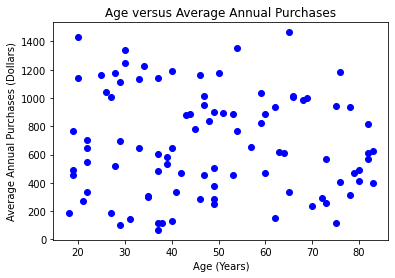

In [15]:
#plot raw data
plt.scatter(x=purchase_data['Age'], y=purchase_data['Average Monthly Purchases'],color="blue")
plt.title('Age versus Average Annual Purchases')
plt.xlabel('Age (Years)')
plt.ylabel('Average Annual Purchases (Dollars)')




Now, let's train our model just wit the feature `Age`. The cell below combines the data seperation, the model training, and the coefficient extraction from the above cells, now storing the model in a new object, `linear_reg_model_age`. **As above, change the training data from `X_train = purchase_data[['Membership (Months)']]` to train on `Age` instead, then run the cell to retrain the model.** What do the slope and intercept suggest about the relationship of age and purchas volume? 

In [18]:
# seperate data into features and outcomes
X_train = purchase_data[['Age']]
y_train = purchase_data['Average Monthly Purchases']


#train create and train model
from sklearn.linear_model import LinearRegression

linear_reg_model_age = LinearRegression()
linear_reg_model_age.fit(X_train, y_train)

#examine coefficients 
theta0 = linear_reg_model_age.intercept_ #extract intercept
theta1 = linear_reg_model_age.coef_[0] # extract slope
print("fitted slope theta1=%s, fitted intercept theta0=%s" % (theta1, theta0))

fitted slope theta1=-1.0755529855211055, fitted intercept theta0=727.8652892562988


The slope of this model should be sligtly negative. In other words, purchase volume appears to decrease slightly with age. You should be cautious about reading too much into this relationship, given that it appears (from the plot and the model) to be relatively week, it still may provide some useful information for the overall model. **Run the cell below to plot the relationship of `Age` and `Average Monthly Purchases`, using similar code as above.** What relationship do you see? 

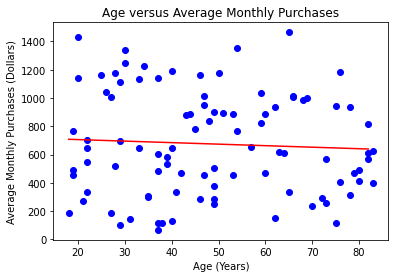

In [19]:
#plot raw data
plt.scatter(x=purchase_data['Age'], y=purchase_data['Average Monthly Purchases'],color="blue")
plt.title('Age versus Average Monthly Purchases')
plt.xlabel('Age (Years)')
plt.ylabel('Average Monthly Purchases (Dollars)')
#plot linear fit
new_x = np.arange(start=purchase_data['Age'].min(),stop=purchase_data['Age'].max(),step=1)
new_y = theta0+theta1*new_x
plt.plot(new_x,new_y,color="red")
plt.show()

Let's again make predictions for our hypothetical customer, who is 24 and has been a member for 12 months. **Run the cell to make the prediction, then change the `Age` as before and rerun the cell to see what the model predicts for different ages. Try low age (say, 18), and a higher age (say, 85).** How does the prediction in purchase volume change?  

In [23]:
#create new Data Frame with new customer
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[18]})
purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[24]})
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[85]})
#make predictions
predictions = linear_reg_model_age.predict(purchase_prediction_df[['Age']])
#add predictions to Data Frame 
purchase_prediction_df['Average Monthly Purchases'] = predictions
print(purchase_prediction_df)

   Membership (Months)  Age  Average Monthly Purchases
0                   12   24                 702.052018


Now, let's combine both of our features, and perform multivariate linear regression. **Run the code below to seperate the data, train the model and save it in the variable `linear_reg_model_combined`, and then print the model coefficients. Do the signs and magnitudes of these coefficients match your expections?

In [24]:
# seperate data into features and outcomes
X_train = purchase_data[['Membership (Months)', 'Age']]
y_train = purchase_data['Average Monthly Purchases']


#train create and train model
from sklearn.linear_model import LinearRegression

linear_reg_model_combined = LinearRegression()
linear_reg_model_combined.fit(X_train, y_train)

#examine coefficients 
theta0 = linear_reg_model_combined.intercept_ #extract intercept
theta1 = linear_reg_model_combined.coef_[0] # extract first coefficient
theta2 = linear_reg_model_combined.coef_[1] # extract second coefficient
print("fitted coefficient theta1=%s, fitted coefficient theta2=%s, fitted intercept theta0=%s" % (theta1, theta2, theta0))

fitted coefficient theta1=18.358788097179094, fitted coefficient theta2=-2.6751069042795996, fitted intercept theta0=219.22999390910633


Now, let's make predictions on our hypothetical customer with this multivariate model. **Run the cell below to view these predictions. Then change both `Membership (Months)` and `Age` for a few different values and rerun the cell to see how the prediction changes.**   

In [25]:
#create new Data Frame with new customer
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[18]})
purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[24]})
# purchase_prediction_df = pd.DataFrame({"Membership (Months)":[12],"Age":[85]})
#make predictions
predictions = linear_reg_model_combined.predict(purchase_prediction_df[["Membership (Months)","Age"]])
#add predictions to Data Frame 
purchase_prediction_df['Average Annual Purchases'] = predictions
print(purchase_prediction_df)

   Membership (Months)  Age  Average Annual Purchases
0                   12   24                375.332885


To finish up, let's look at diagnostic metrics from this model that we touched on in lecture: mean absolute error, the average absolute difference between predicted and true market sizes, and mean squared error, the average squared difference between predicted and true market sizes.

Remember that mean absolute error gives an intuitive idea of the difference between  model predictions and reality, and that mean squared error is the quantity that is minimized by our trained linear regression model. **Run the cell below to get thse values for the combined model.**

In [ ]:
#examine training error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, linear_reg_model_combined.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, linear_reg_model_combined.predict(X_train)))

Mean Absolute Error: 148.33557236212926
Mean Squared Error: 31648.215052350584


What might you take away from this dataset and your regressions? Purchase volumes seem to increase with customer membership duration and slightly decrease with age. This might suggest further questions to examine: what products are driving purchases amongst younger customers and customers who have been members longer? Should rewards for longer term members be increased? Should more advertising be targeted at younger (perhaps more lucrative) potential customers? 